In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import linear_model
import random

In [2]:
# Setting
nodeCount = 6

In [3]:
nodeCount = nodeCount - nodeCount % 2
nodes = []
links = []
lastNode = chr(65+nodeCount)
for i in range (nodeCount):
    nodes.append(chr(65+i)) # 65 : A
G = nx.DiGraph()
# RING network
for i in range( nodeCount ):
    links.append( (nodes[i], nodes[(i+1)%nodeCount]) )
    # links.append( (nodes[i], nodes[(i+nodeCount-1)%nodeCount]) )
# STAR network
nodes.append( lastNode )
for i in range( nodeCount ):
    links.append( (nodes[i], lastNode) )
    links.append( (lastNode, nodes[i]) )
# Implement network
G.add_nodes_from(nodes)
G.add_edges_from(links)

In [4]:
# node name
names = {}
for name in nodes:
    names[name] = name
# link name
linknames = {}
for link in links:
    linknames[link] = ''
# source-receiver (origin-destination) list
od_list = []
for i in range(nodeCount):
    od_list.append((nodes[i], nodes[int((i+nodeCount/2)%nodeCount)]))

{('A', 'B'): Text(0.5220262361792718, -0.6460392225834566, ''),
 ('B', 'C'): Text(0.7625176792315775, -0.0631211832647805, ''),
 ('C', 'D'): Text(0.2685299162419811, 0.7484187851291135, ''),
 ('D', 'E'): Text(-0.612215821068331, 0.6290600897213037, ''),
 ('E', 'F'): Text(-0.7853012807045554, -0.13864330112504777, ''),
 ('F', 'A'): Text(-0.14504698644654906, -0.602202645035914, ''),
 ('A', 'G'): Text(0.13499942254130878, -0.2948268151904055, ''),
 ('G', 'A'): Text(0.13499942254130878, -0.2948268151904055, ''),
 ('B', 'G'): Text(0.3765170702045678, -0.27868493023426955, ''),
 ('G', 'B'): Text(0.3765170702045678, -0.27868493023426955, ''),
 ('C', 'G'): Text(0.3754908655936144, 0.28809122412827065, ''),
 ('G', 'C'): Text(0.3754908655936144, 0.28809122412827065, ''),
 ('D', 'G'): Text(-0.11747069278502856, 0.5328550381596245, ''),
 ('G', 'D'): Text(-0.11747069278502856, 0.5328550381596245, ''),
 ('E', 'G'): Text(-0.5052548717166976, 0.1687325287204608, ''),
 ('G', 'E'): Text(-0.505254871716

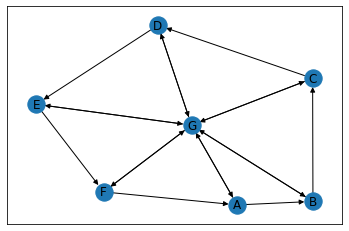

In [15]:
pos = nx.spring_layout(G, k=0.8)
nx.draw_networkx(G, pos, labels=names)
nx.draw_networkx_edge_labels(G, pos, edge_labels=linknames)

In [6]:
# 1000パケット送信したときのパケット通過数 (the number of packets passed when 1000 packets are transmitted)
od_success = {}
for od in od_list:
    od_success[ od ] = 900
print(od_success)

{('A', 'D'): 900, ('B', 'E'): 900, ('C', 'F'): 900, ('D', 'A'): 900, ('E', 'B'): 900, ('F', 'C'): 900}


In [7]:
# ベクトル\hat{y}をy_e2eとして作成 (generate vector \hat{y} as y_e2e)
y = np.zeros(len(od_list)) # 初期化 (initialization)
for i in range(len(od_list)):
    print(od_list[i], od_success[od_list[i]])
    y[i] = od_success[od_list[i]]
y_e2e = -np.log(y/1000)

('A', 'D') 900
('B', 'E') 900
('C', 'F') 900
('D', 'A') 900
('E', 'B') 900
('F', 'C') 900


In [8]:
y

array([900., 900., 900., 900., 900., 900.])

In [9]:
y_e2e

array([0.10536052, 0.10536052, 0.10536052, 0.10536052, 0.10536052,
       0.10536052])

In [10]:
A = np.zeros((len(od_list), len(links))) # 初期化 (initialization)
for i in range(len(od_list)):
    print(od_list[i])
    paths = list(nx.all_simple_paths(G, od_list[i][0], od_list[i][1]))
    idx = random.randint(0, len(paths)-1)
    # path = nx.shortest_path(G, od_list[i][0], od_list[i][1])
    path = paths[idx]
    print(path)
    for j in range(len(path)-1):
        k = links.index((path[j], path[j+1]))
        A[i,k] = 1

('A', 'D')
['A', 'B', 'C', 'G', 'D']
('B', 'E')
['B', 'C', 'G', 'E']
('C', 'F')
['C', 'D', 'G', 'F']
('D', 'A')
['D', 'G', 'A']
('E', 'B')
['E', 'G', 'F', 'A', 'B']
('F', 'C')
['F', 'A', 'G', 'C']


In [11]:
A

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0.]])

In [12]:
# 関数csを定義 (define function cs)
def cs(X, Y, alpha, positive):
    clf = linear_model.Lasso(alpha=alpha, fit_intercept=False, normalize=False, positive=positive)
    clf.fit(X,Y)
    return clf.coef_

[5.61634830e-06 1.02428020e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.02428020e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.38777878e-17 0.00000000e+00
 1.02430828e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[7.51772095e-06 1.00706168e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00706168e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.04697370e-16 0.00000000e+00
 1.00709927e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[9.16988959e-06 9.79735808e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.79735808e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.79781658e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[5.69562150e-06 9.36389178e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.36389178e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.38777878e-17 0.00

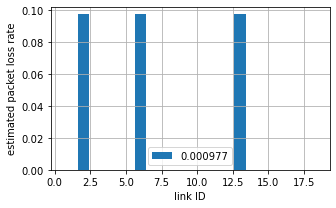

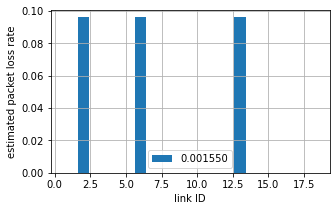

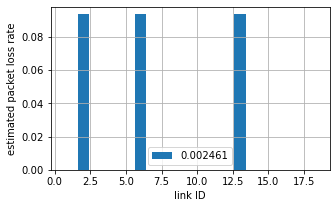

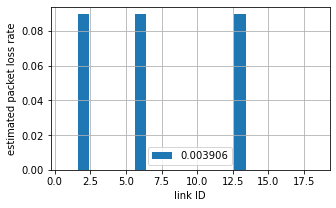

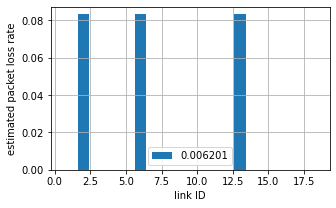

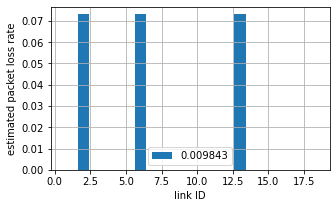

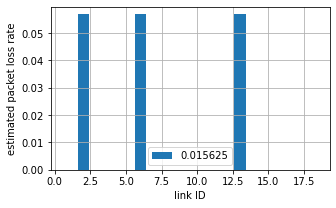

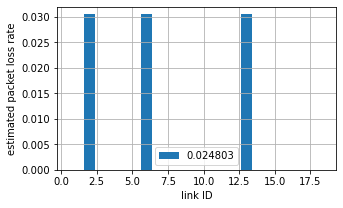

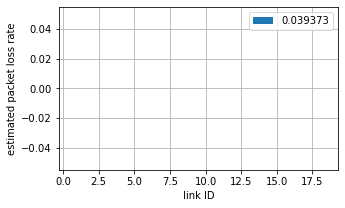

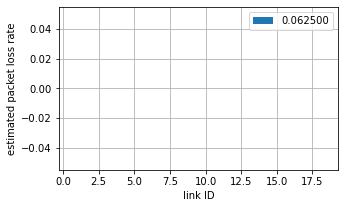

In [13]:
# csのXにAを,Yにy_e2eを代入して\hat{x}を計算.estが\hat{x} (Calculate \hat{x} by substituting A for X and y_e2e for Y in cs. est is \hat{x})
# alphaを変えて実験 (Experiment by changing alpha)
for ALPHA in np.logspace(-10, -4, 10, base=2):
    est = cs(A, y_e2e, alpha=ALPHA, positive=True)
    print(est)
    plt.figure(figsize=(5,3))
    plt.grid()
    plt.bar(range(1, len(est)+1), 1 - np.exp(-est), label='%f' %ALPHA )
    plt.legend()
    plt.xlabel('link ID')
    plt.ylabel('estimated packet loss rate')